# A6 - Classification Analysis
Tyler Bevan


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from sklearn.metrics import *
import seaborn as sns
%matplotlib inline

rd = pd.read_csv('compas-scores-two-years.csv')
temp = rd[(rd.days_b_screening_arrest <= 30) & (rd.days_b_screening_arrest >= -30) & (rd.is_recid != -1)
         &(rd.c_charge_degree != "O") & (rd.score_text != 'N/A')]
all_data = temp[['sex', 'race', 'decile_score', 'score_text', 'v_decile_score', 'v_score_text', 'is_recid', 'is_violent_recid']].copy()
all_data['will_recid'] = all_data['decile_score'].map(lambda x: 0 if x < 8 else 1)
all_data['will_v_recid'] = all_data['v_decile_score'].map(lambda x: 0 if x < 8 else 1)

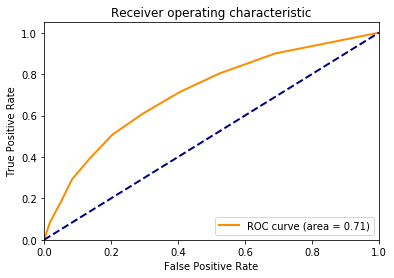

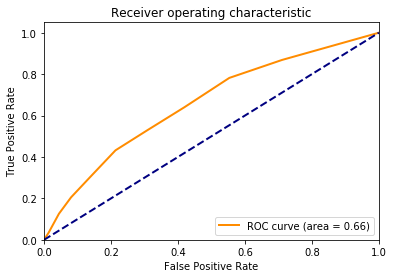

In [2]:
def plot_roc(target, predicted):
    x, y, _ = roc_curve(target, predicted)
    my_auc = auc(x, y)
    fig = plt.figure()
    axis = fig.add_subplot(1, 1, 1)
    lw = 2
    axis.plot(x, y, color='darkorange',
              lw=lw, label='ROC curve (area = %0.2f)' % my_auc)
    axis.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    axis.set_xlim([0.0, 1.0])
    axis.set_ylim([0.0, 1.05])
    axis.set_xlabel('False Positive Rate')
    axis.set_ylabel('True Positive Rate')
    axis.set_title('Receiver operating characteristic')
    axis.legend(loc="lower right")
plot_roc(all_data['is_recid'], all_data['decile_score'])
plot_roc(all_data['is_violent_recid'], all_data['v_decile_score'])

In [14]:
def stats(data):
    non_recid = len(data[(data.is_recid == 0)])
    recid = len(data[(data.is_recid == 1) & (data.is_violent_recid == 0)])
    v_recid = len(data[(data.is_violent_recid == 1)])
    true_pos = len(data[(data.is_recid == 1) & (data.will_recid == 1)])
    true_neg = len(data[(data.is_recid == 0) & (data.will_recid == 0)])
    false_pos = len(data[(data.is_recid == 0) & (data.will_recid == 1)])
    false_neg = len(data[(data.is_recid == 1) & (data.will_recid == 0)])
    v_true_pos = len(data[(data.is_violent_recid == 1) & (data.will_v_recid == 1)])
    v_true_neg = len(data[(data.is_violent_recid == 0) & (data.will_v_recid == 0)])
    v_false_pos = len(data[(data.is_violent_recid == 0) & (data.will_v_recid == 1)])
    v_false_neg = len(data[(data.is_violent_recid == 1) & (data.will_v_recid == 0)])
    precision =  true_pos / (true_pos + false_pos)
    v_precision = v_true_pos / (v_true_pos + v_false_pos)
    npv = true_neg / (true_neg + false_pos)
    v_npv = v_true_neg / (v_true_neg + v_false_pos)
    recall = true_pos / (true_pos + false_neg)
    v_recall = v_true_pos / (v_true_pos + v_false_neg)
    fpr = false_pos / (false_pos + true_neg)
    v_fpr = v_false_pos / (v_false_pos + v_true_neg)
    fnr = false_neg / (false_neg + true_pos)
    v_fnr = v_false_neg / (v_false_neg + v_true_pos)
    print("    PPV: {}".format(precision))
    print("    Violent PPV: {}".format(v_precision))
    print("    NPV: {}".format(npv))
    print("    Violent NPV: {}".format(v_npv))
    print("    Recall: {}".format(recall))
    print("    Violent Recall: {}".format(v_recall))
    print("    False Positive Rate: {}".format(fpr))
    print("    Violent False Positive Rate: {}".format(v_fpr))
    print("    False Negative Rate: {}".format(fnr))
    print("    Violent False Negative Rate: {}".format(v_fnr))

print("All data stats:")
stats(all_data)

All data stats:
    PPV: 0.7666083916083916
    Violent PPV: 0.24315068493150685
    NPV: 0.9160905091137649
    Violent NPV: 0.9193430656934306
    Recall: 0.29331103678929765
    Violent Recall: 0.20520231213872833
    False Positive Rate: 0.08390949088623507
    Violent False Positive Rate: 0.08065693430656934
    False Negative Rate: 0.7066889632107023
    Violent False Negative Rate: 0.7947976878612717


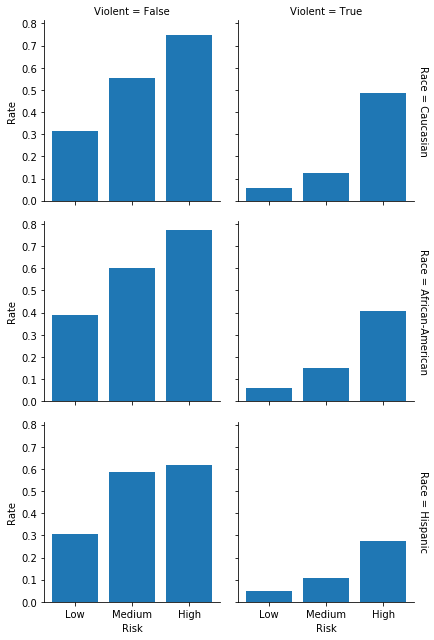

In [4]:
grid_data = []
for race in ['Caucasian', 'African-American', 'Hispanic']:
    for risk in ['Low', 'Medium', 'High']:
        rate = (len(all_data[(all_data.race == race) & (all_data.score_text == risk) & (all_data.is_recid == 1)]) / 
               len(all_data[(all_data.race == race) & (all_data.score_text == risk)]))
        v_rate = (len(all_data[(all_data.race == race) & (all_data.score_text == risk) & (all_data.is_violent_recid == 1)]) / 
                 len(all_data[(all_data.race == race) & (all_data.v_score_text == risk)]))
        grid_data.append([race, risk, False, rate])
        grid_data.append([race, risk, True, v_rate])

grid = sns.FacetGrid(pd.DataFrame(grid_data, columns=['Race', 'Risk', 'Violent', 'Rate']), col='Violent', row='Race', margin_titles=True)
grid.map(plt.bar, 'Risk', 'Rate')

Caucasian stats:
    PPV: 0.7488789237668162
    Violent PPV: 0.20618556701030927
    NPV: 0.9544344995931652
    Violent NPV: 0.9598330725091289
    Recall: 0.19107551487414187
    Violent Recall: 0.10752688172043011
    False Positive Rate: 0.045565500406834825
    Violent False Positive Rate: 0.040166927490871154
    False Negative Rate: 0.8089244851258581
    Violent False Negative Rate: 0.8924731182795699

African-American stats:
    PPV: 0.7751479289940828
    Violent PPV: 0.23917995444191345
    NPV: 0.8644793152639088
    Violent NPV: 0.878501273190251
    Recall: 0.3694303440496334
    Violent Recall: 0.24647887323943662
    False Positive Rate: 0.1355206847360913
    Violent False Positive Rate: 0.121498726809749
    False Negative Rate: 0.6305696559503666
    Violent False Negative Rate: 0.7535211267605634

Hispanic stats:
    PPV: 0.6170212765957447
    Violent PPV: 0.20689655172413793
    NPV: 0.9423076923076923
    Violent NPV: 0.9511677282377919
    Recall: 0.14720812182

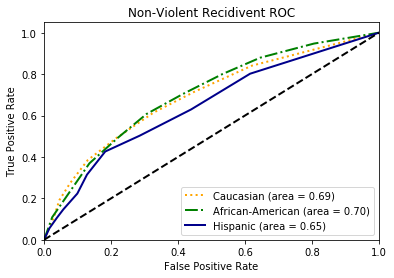

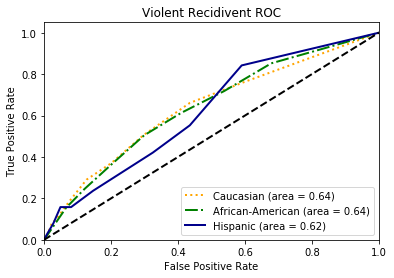

In [12]:
for race in ['Caucasian', 'African-American', 'Hispanic']:
    print("{} stats:".format(race))
    stats(all_data[(all_data.race == race)])
    print("")

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)

cdata = all_data[(all_data.race == 'Caucasian')]
x, y, _ = roc_curve(cdata['is_recid'], cdata['decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='orange', linestyle=':',
          lw=2, label='Caucasian (area = %0.2f)' % my_auc)

adata = all_data[(all_data.race == 'African-American')]
x, y, _ = roc_curve(adata['is_recid'], adata['decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='green', linestyle='-.',
          lw=2, label='African-American (area = %0.2f)' % my_auc)

hdata = all_data[(all_data.race == 'Hispanic')]
x, y, _ = roc_curve(hdata['is_recid'], hdata['decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='darkblue',
          lw=2, label='Hispanic (area = %0.2f)' % my_auc)

axis.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
axis.set_xlim([0.0, 1.0])
axis.set_ylim([0.0, 1.05])
axis.set_xlabel('False Positive Rate')
axis.set_ylabel('True Positive Rate')
axis.set_title('Non-Violent Recidivent ROC')
axis.legend(loc="lower right")

#######################################################################

fig = plt.figure()
axis = fig.add_subplot(1, 1, 1)

cdata = all_data[(all_data.race == 'Caucasian')]
x, y, _ = roc_curve(cdata['is_violent_recid'], cdata['v_decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='orange', linestyle=':',
          lw=2, label='Caucasian (area = %0.2f)' % my_auc)

adata = all_data[(all_data.race == 'African-American')]
x, y, _ = roc_curve(adata['is_violent_recid'], adata['v_decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='green', linestyle='-.',
          lw=2, label='African-American (area = %0.2f)' % my_auc)

hdata = all_data[(all_data.race == 'Hispanic')]
x, y, _ = roc_curve(hdata['is_violent_recid'], hdata['v_decile_score'])
my_auc = auc(x, y)
axis.plot(x, y, color='darkblue',
          lw=2, label='Hispanic (area = %0.2f)' % my_auc)

axis.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
axis.set_xlim([0.0, 1.0])
axis.set_ylim([0.0, 1.05])
axis.set_xlabel('False Positive Rate')
axis.set_ylabel('True Positive Rate')
axis.set_title('Violent Recidivent ROC')
axis.legend(loc="lower right")

From the above graphs and metrics it appears that the model has poor results across the spectrum. However, persons of African-American descent are three times more likely to be falsely predicted to become recidivent based on the false positive rate. They however are less likely to be falsely predicted to not be, which is probably a direct result of the previous effect. It does have much higher recall for this group. As a result it appears that the model is biased against the African-American group. In addition, the model appears to perform worse for people of Hispanic descent, as is shown by the ROC graphs. 

The different metrics do tell us very different things. For example, PPV might tell us that 75% of positives are correct. This sounds good until you realize that the FNR is 80%, meaning 80% of recidivents are not identified. That means that the vast majority of future recidivents are not identified. The only redeeming value is that the FPR is fairly low. However, because the number of recidivents is small compared to the population it isn't that surprising that it tends towards false negatives. Negative values greatly outweigh the positives in the data and we might assume that the training data was similar.